In [65]:
import xarray as xr
from pyproj import Proj
from dask.diagnostics import ProgressBar
import numpy as np
import matplotlib.pyplot as plt
import xesmf as xe
import rioxarray

In [2]:
# select lat y lons from the points of interest

file = '/data/AIDL-UPC/daymet_v4_daily/prcp/used/short/daymet_v4_daily_na_prcp_sel50_latlon_Nevada_Utah.nc'
data_latlon = xr.open_dataset(file)

In [3]:
path_precip  = '/data/AIDL-UPC/daymet_v4_daily/prcp/used/short/'
file_precip = 'daymet_v4_daily_na_prcp_'

In [4]:
data_precip = xr.open_mfdataset(path_precip + file_precip+'*_sel200.nc')

In [5]:
points = np.arange(50)
xs = []
ys = []
for ipoint in points:
    c = np.argwhere((data_precip.lon.values[0,:,:] == data_latlon.lon.values[ipoint]))
    y,x  = c[0]
    xs.append(x), ys.append(y)


In [30]:
for ipoint in points[:1]:
    c = np.argwhere((data_precip.lon.values[0,:,:] == data_latlon.lon.values[ipoint]))
    y,x  = c[0]
    
    precip = data_precip.isel(x = x, y =y).groupby('time.year').mean()

In [34]:
precip

<xarray.Dataset>
Dimensions:                  (year: 21)
Coordinates:
    x                        float32 -8.572e+05
    y                        float32 -1.19e+05
  * year                     (year) int64 2000 2001 2002 2003 ... 2018 2019 2020
Data variables:
    yearday                  (year) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    lambert_conformal_conic  (year) float64 -3.277e+04 -3.277e+04 ... -3.277e+04
    prcp                     (year) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [7]:
for ipoint in points[:1]:
    c = np.argwhere((data_precip.lon.values[0,:,:] == data_latlon.lon.values[ipoint]))
    y,x  = c[0]
    
    precip = data_precip.isel(x = x, y =y).groupby('time.year').mean()

<xarray.Dataset>
Dimensions:                  (x: 200, y: 200, time: 7665, nv: 2)
Coordinates:
  * x                        (x) float32 9.018e+05 -2.784e+06 ... -1.367e+06
  * y                        (y) float32 1.657e+06 3.623e+06 ... 1.642e+06
    lat                      (time, y, x) float32 57.2 51.14 ... 55.47 56.11
    lon                      (time, y, x) float32 -84.76 -143.2 ... -122.7
  * time                     (time) datetime64[ns] 2000-01-01T12:00:00 ... 20...
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 dask.array<chunksize=(365,), meta=np.ndarray>
    time_bnds                (time, nv) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    lambert_conformal_conic  (time) int16 -32767 -32767 -32767 ... -32767 -32767
    prcp                     (time, y, x) float32 dask.array<chunksize=(365, 200, 200), meta=np.ndarray>
Attributes:
    start_year:        2000
    source:            Daymet Software Version 4.0
    Version_software:  Daymet Software Version 4.0
    Version_data:      Daymet Data Version 4.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...

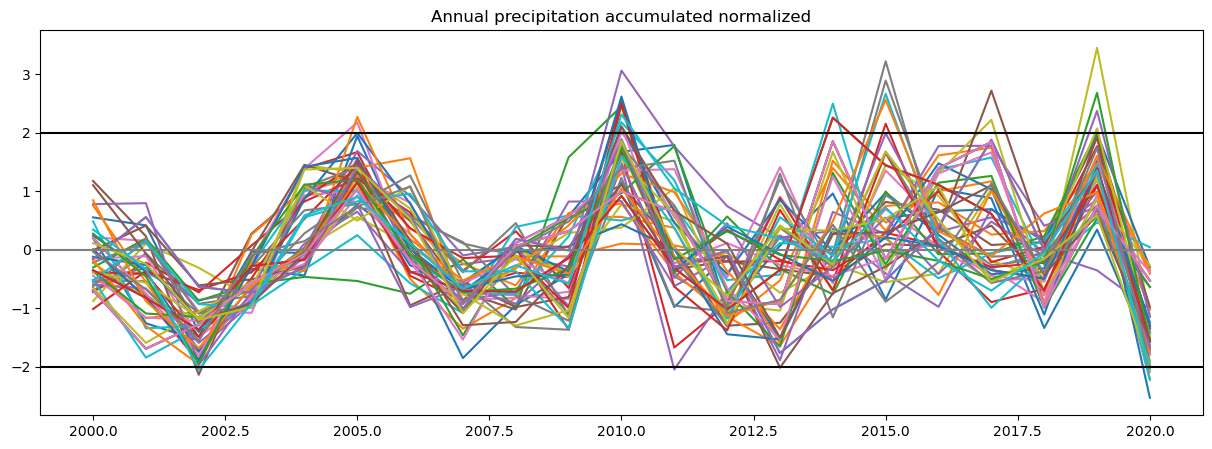

In [47]:
fig, axes = plt.subplots(ncols=1,nrows = 1, figsize=(15,5))


for ipoint in points:
    c = np.argwhere((data_precip.lon.values[0,:,:] == data_latlon.lon.values[ipoint]))
    y,x  = c[0]
    
    precip = data_precip.isel(x = x, y =y).groupby('time.year').sum()
    
    precip = (precip - precip.mean())/precip.std()
    
    axes.plot(precip.year, precip.prcp.values)
axes.axhline(y = 0, color = 'grey')
axes.axhline(y = -2, color = 'k')
axes.axhline(y = 2, color = 'k')

plt.title('Annual precipitation accumulated normalized')
    
plt.show()
    

In [46]:
latitude = []
longitude = []
for ipoint in points:
    c = np.argwhere((data_precip.lon.values[0,:,:] == data_latlon.lon.values[ipoint]))
    y,x  = c[0]
    
    latitude.append(data_precip.lat.isel(x = x, y =y, time =0).item())
    longitude.append(data_precip.lon.isel(x = x, y =y, time =0).item())
latitude = np.array(latitude)
longitude = np.array(longitude)

In [ ]:
List3= [p for p in List2 if all(cdist(i,p)>20 for i in List1)]

In [76]:
new = []
for ipoint in points[1:]:
    exclude =0
    for jpoint in points[:ipoint]:
        dist = haversine(longitude[ipoint], latitude[ipoint], longitude[jpoint], latitude[jpoint])
        if dist<100:
            exclude = 1
        
    if exclude==0:
        new.append(ipoint)
        
            
        #if (np.array(dist)-50<0).any() :
        #    c = np.where(np.array(dist)-50<0)
        #    print(c, c[0].shape)
        #print(dist)

In [77]:
len(new)

19

In [79]:
import xarray as xr
from pyproj import Proj
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
rivers = cartopy.feature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines',
    scale='10m', facecolor='none', edgecolor='blue')
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])

states = cartopy.feature.STATES

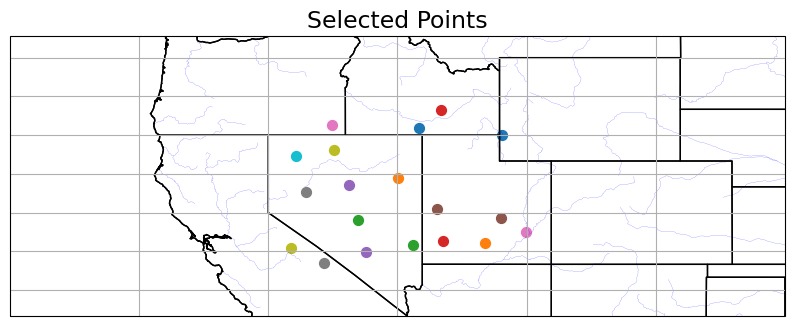

In [81]:
fig, axes = plt.subplots(ncols=1,nrows = 1, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,10))
axes.set_title('Selected Points', fontsize = 17 )   

#points = np.arange(10)
for ipoint in new:
    axes.scatter(longitude[ipoint], latitude[ipoint], s = 50)
#for ipoint in range(lons.shape[0]):
#    axes.scatter(lons[ipoint], lats[ipoint], s = 50)
    #axes.annotate(str(ipoint+1), (lons[ipoint], lats[ipoint]), fontsize = 10)

axes.set_extent([-130, -100, 35, 45])    
# add rivers
axes.add_feature(rivers, linewidth=0.1)
# add coastlines
axes.coastlines()
axes.gridlines()
axes.add_feature(states)
# add country limits
axes.add_feature(cartopy.feature.BORDERS)

#plt.tight_layout()
plt.show()
#fig.savefig('/home/vestella/Figs/Banjul/Banjul_ExtTemp.png')

In [29]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

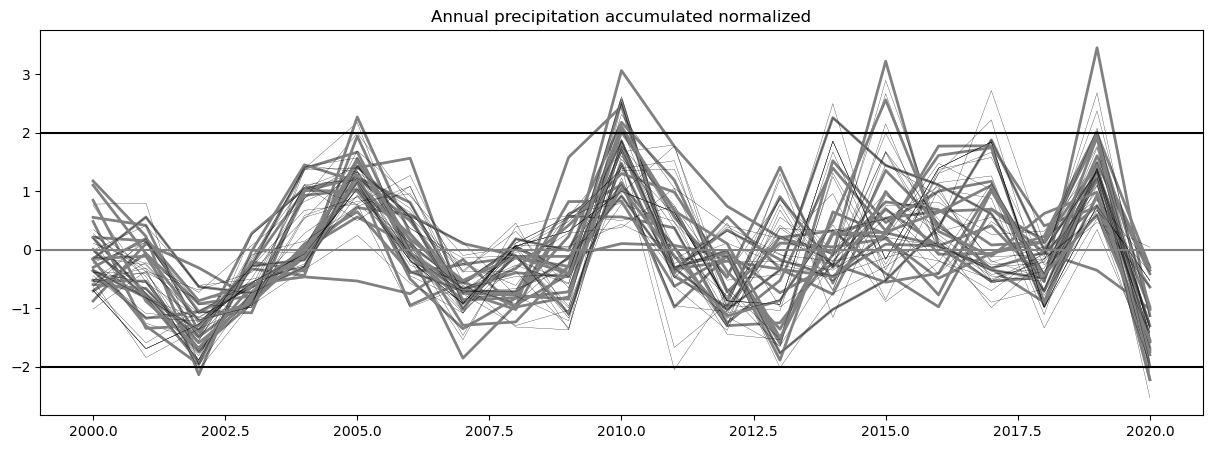

In [87]:
fig, axes = plt.subplots(ncols=1,nrows = 1, figsize=(15,5))


for ipoint in points:
    c = np.argwhere((data_precip.lon.values[0,:,:] == data_latlon.lon.values[ipoint]))
    y,x  = c[0]
    
    precip = data_precip.isel(x = x, y =y).groupby('time.year').sum()
    
    precip = (precip - precip.mean())/precip.std()
    
    axes.plot(precip.year, precip.prcp.values, lw = 0.2, color = 'k')

    if ipoint in new:
        axes.plot(precip.year, precip.prcp.values, color = 'grey', lw = 2)
axes.axhline(y = 0, color = 'grey')
axes.axhline(y = -2, color = 'k')
axes.axhline(y = 2, color = 'k')

plt.title('Annual precipitation accumulated normalized')
    
plt.show()
    

In [88]:
new

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 22, 24, 25, 29, 31, 41, 45]